In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re as re
import warnings
warnings.filterwarnings('ignore')

In [7]:
train=pd.read_csv('data/titanic/train.csv',header=0, dtype={'Age': np.float64})
test=pd.read_csv('data/titanic/test.csv',header=0,dtype={'Age':np.float64})
full_data=[train, test]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
train.Survived.groupby(train.Pclass).mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train[['Survived','Pclass']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train.Survived.groupby(train.Sex).mean().reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
for data in full_data:
    data['Family']=data['SibSp'] + data['Parch'] + 1

In [21]:
family=train[['Family','Survived']].groupby('Family', as_index=False).mean()
family

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [29]:
family_count=train.Family.value_counts().reset_index()
family_count.columns=['Family','count']
family_count

,Family,count
0,1,537
1,2,161
2,3,102
3,4,29
4,6,22
5,5,15
6,7,12
7,11,7
8,8,6


In [30]:
pd.merge(family,family_count, on='Family')

,Family,Survived,count
0,1,0.303538,537
1,2,0.552795,161
2,3,0.578431,102
3,4,0.724138,29
4,5,0.200000,15
5,6,0.136364,22
6,7,0.333333,12
7,8,0.000000,6
8,11,0.000000,7


In [36]:
for data in full_data:
    data['Alone']=0
    data.Alone[data.Family==1]=1

In [37]:
train.Survived.groupby(train.Alone).mean().reset_index()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [38]:
for data in full_data:
    data['Embarked'].fillna('S')
train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [43]:
train.Fare.fillna(train.Fare.median())
quantiles=pd.qcut(train.Fare, 4, labels=['q1','q2','q3','q4'])
train.Survived.groupby(quantiles).mean().reset_index()

,Fare,Survived
0,q1,0.197309
1,q2,0.303571
2,q3,0.454955
3,q4,0.581081


In [45]:
test.Fare.fillna(train.Fare.median())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418,

In [46]:
train.Age.isnull().sum()

177

In [47]:
for data in full_data:
    avg_mean=data.Age.mean()
    avg_std=data.Age.std()
    avg_size=data.Age.isnull().sum()
    fill_v=np.random.randint(avg_mean-avg_std, avg_mean+avg_std, size=avg_size)
    data.Age[data.Age.isnull()]=fill_v

In [49]:
train['categoriesAge']=pd.cut(train.Age, 5)
train[['Survived','categoriesAge']].groupby('categoriesAge', as_index=False).mean()

,categoriesAge,Survived
0,"(0.34, 16.336]",0.513274
1,"(16.336, 32.252]",0.357942
2,"(32.252, 48.168]",0.370518
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [50]:
def get_title(name):
    title_search=re.search(' ([A-Za-z]+)\.', name)
    if (title_search):
        return title_search.group(1)
    else:
        return ""
for data in full_data:
    data['Title']=data['Name'].apply(get_title)
train.Title.head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

In [51]:
pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [55]:
title=train.Title.copy()
count=title.value_counts()

In [60]:
rare=count.index[count<3]
rare

Index(['Mlle', 'Major', 'Col', 'Lady', 'Capt', 'Sir', 'Jonkheer', 'Countess',
       'Don', 'Mme', 'Ms'],
      dtype='object')

In [62]:
title.replace(rare,'Rare',inplace=True)
title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       14
Dr          7
Rev         6
Name: Title, dtype: int64

In [63]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4}
t2=title.map(title_mapping)
t2.value_counts()

1.0    517
2.0    182
3.0    125
4.0     40
Name: Title, dtype: int64

In [66]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    
train.Survived.groupby(train.Title).mean().reset_index()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [86]:
def handle_category(data):
    dummy_sex=pd.get_dummies(data.Sex, prefix='Sex')
    dummy_title=pd.get_dummies(data.Title, prefix='Title')
    dummy_embark=pd.get_dummies(data.Embarked,prefix='Embark')
    dat=pd.concat([data, dummy_sex, dummy_title, dummy_embark],axis=1)
    drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch', 'Family','Sex','Title','Embarked']
    return dat.drop(drop_elements,axis=1)


In [87]:
train=handle_category(train)
test=handle_category(test)
train.drop(['categories','categoriesAge'],axis=1, inplace=True)

In [88]:
train.head(3)

,Survived,Pclass,Age,Fare,Alone,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embark_C,Embark_Q,Embark_S
0,0,3,22.0,7.2500,0,0,1,0,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,0,0,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,1,0,0,1,0,0,0,0,0,1


In [89]:
test.head(3)

,Pclass,Age,Fare,Alone,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embark_C,Embark_Q,Embark_S
0,3,34.5,7.8292,1,0,1,0,0,1,0,0,0,1,0
1,3,47.0,7.0000,0,1,0,0,0,0,1,0,0,0,1
2,2,62.0,9.6875,1,0,1,0,0,1,0,0,0,1,0


In [127]:
age=train.Age.copy()
age2=pd.qcut(age, 4, labels=['0','1','2','3'])
print(age2.dtype)
age2=age2.astype(np.integer)
age2.dtypes

category


dtype('int64')

In [140]:
full_data=[train, test]
for dataset in full_data:
    age=pd.cut(dataset.Age, 5, labels=['0','1','2','3','4'])
    dataset['Age']=age.astype(np.integer)

0    1
1    2
2    1
3    2
Name: Age, dtype: int64

In [141]:
for dataset in full_data:
    fare=pd.qcut(train.Fare, 4,labels=['0','1','2','3'])
    dataset['Fare']=fare.astype(np.integer)
train['Fare'].head()

0    0
1    3
2    1
3    3
4    1
Name: Fare, dtype: int64

In [148]:
train_dat=train.values
test_dat=test.values

In [149]:
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


In [150]:
clf=[KNeighborsClassifier(n_neighbors=3),
     SVC(probability=True),
     DecisionTreeClassifier(),
     RandomForestClassifier(),
     AdaBoostClassifier(),
     GradientBoostingClassifier(),
     GaussianNB(),
     LinearDiscriminantAnalysis(),
     QuadraticDiscriminantAnalysis(),
     LogisticRegression()
    ]
sss=StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

In [165]:
y.shape

(891,)

In [167]:
x=train_dat[:,1:]
y=train_dat[:,0]
acc_dict={}

for train_index, test_index in sss.split(x, y):
    x_train, y_train=x[train_index],y[train_index]
    x_test, y_test=x[test_index],y[test_index]
    
    for c in clf:
        c.fit(x_train,y_train)
        acc=accuracy_score(y_test, c.predict(x_test))
        name=c.__class__.__name__
        if(name in acc_dict):
            acc_dict[name] +=acc
        else:
            acc_dict[name]=acc

acc_dict

{'AdaBoostClassifier': 8.0666666666666664,
 'DecisionTreeClassifier': 8.0444444444444443,
 'GaussianNB': 7.9555555555555548,
 'GradientBoostingClassifier': 8.1333333333333329,
 'KNeighborsClassifier': 8.0222222222222221,
 'LinearDiscriminantAnalysis': 7.9666666666666659,
 'LogisticRegression': 7.9444444444444438,
 'QuadraticDiscriminantAnalysis': 6.3333333333333321,
 'RandomForestClassifier': 8.1111111111111107,
 'SVC': 8.1999999999999993}

In [168]:
for k,v in acc_dict.items():
    acc_dict[k]=v/10
acc_dict

{'AdaBoostClassifier': 0.80666666666666664,
 'DecisionTreeClassifier': 0.80444444444444441,
 'GaussianNB': 0.79555555555555546,
 'GradientBoostingClassifier': 0.81333333333333324,
 'KNeighborsClassifier': 0.80222222222222217,
 'LinearDiscriminantAnalysis': 0.79666666666666663,
 'LogisticRegression': 0.7944444444444444,
 'QuadraticDiscriminantAnalysis': 0.63333333333333319,
 'RandomForestClassifier': 0.81111111111111112,
 'SVC': 0.81999999999999995}

In [191]:
log=pd.DataFrame()
log['clf']=acc_dict.keys()
log['accuracy']=acc_dict.values()
log

,clf,accuracy
0,KNeighborsClassifier,0.802222
1,SVC,0.820000
2,DecisionTreeClassifier,0.804444
3,RandomForestClassifier,0.811111
4,AdaBoostClassifier,0.806667
5,GradientBoostingClassifier,0.813333
6,GaussianNB,0.795556
7,LinearDiscriminantAnalysis,0.796667
8,QuadraticDiscriminantAnalysis,0.633333
9,LogisticRegression,0.794444


In [177]:

dat=[]
for key in acc_dict:
    dat.append([key, acc_dict[key]])
log2=pd.DataFrame(data=dat, columns=['clf','accuracy'])
log2

,clf,accuracy
0,KNeighborsClassifier,0.802222
1,SVC,0.820000
2,DecisionTreeClassifier,0.804444
3,RandomForestClassifier,0.811111
4,AdaBoostClassifier,0.806667
5,GradientBoostingClassifier,0.813333
6,GaussianNB,0.795556
7,LinearDiscriminantAnalysis,0.796667
8,QuadraticDiscriminantAnalysis,0.633333
9,LogisticRegression,0.794444


In [182]:
clf=[]
accuracy=[]
for key in acc_dict:
    clf.append(key)
    accuracy.append(acc_dict[key])
log3=pd.DataFrame({'Classifier':clf, 'Accuracy':accuracy})
log3

,Accuracy,Classifier
0,0.802222,KNeighborsClassifier
1,0.820000,SVC
2,0.804444,DecisionTreeClassifier
3,0.811111,RandomForestClassifier
4,0.806667,AdaBoostClassifier
5,0.813333,GradientBoostingClassifier
6,0.795556,GaussianNB
7,0.796667,LinearDiscriminantAnalysis
8,0.633333,QuadraticDiscriminantAnalysis
9,0.794444,LogisticRegression


In [185]:
pd.DataFrame({'Classifier':list(acc_dict.keys()), 'Accuracy':list(acc_dict.values())})

,Accuracy,Classifier
0,0.802222,KNeighborsClassifier
1,0.820000,SVC
2,0.804444,DecisionTreeClassifier
3,0.811111,RandomForestClassifier
4,0.806667,AdaBoostClassifier
5,0.813333,GradientBoostingClassifier
6,0.795556,GaussianNB
7,0.796667,LinearDiscriminantAnalysis
8,0.633333,QuadraticDiscriminantAnalysis
9,0.794444,LogisticRegression


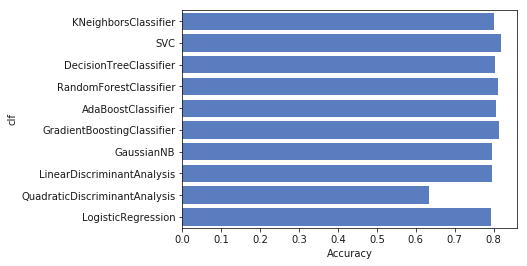

In [194]:
sns.set_color_codes('muted')
sns.barplot('accuracy','clf',data=log,color='b')
plt.xlabel('Accuracy')
plt.ylabel('clf')
plt.show()

In [202]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
clf         10 non-null object
accuracy    10 non-null float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


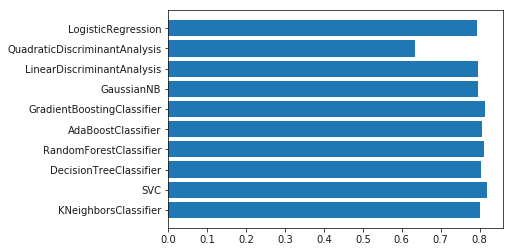

In [209]:
plt.barh(range(10),log.accuracy)
plt.yticks(range(10),log.clf)
plt.show()

In [187]:
candidate=RandomForestClassifier()
candidate.fit(x,y)
candidate.predict(test)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0,